<a href="https://colab.research.google.com/github/yuyangweng/Project/blob/main/peak_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Peak** **Fitting**


In [2]:
pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import numpy as np
import pandas as pd
from lmfit import Model
from numpy import exp, pi, sqrt
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [19]:
data_path = '/content/drive/MyDrive/1.csv'
headers = ['raman_shift', 'intensity']
df = pd.read_csv(data_path, names=headers)

In [18]:
df

,raman_shift,intensity
0,1054.109619,-11.634156
1,1055.092589,-11.634156
2,1056.075560,-11.634156
3,1057.058530,-11.634156
4,1058.041500,-11.634156
...,...,...
1995,3015.135258,20.742223
1996,3016.118228,10.371119
1997,3017.101198,0.000000
1998,3018.084168,0.000000


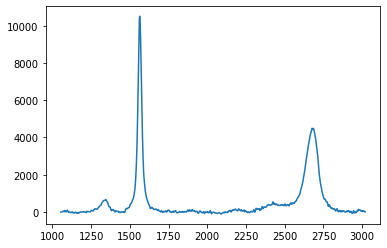

In [29]:
plt.plot(df.raman_shift,df.intensity)

In [31]:
def gaussian(x, amp, cen, wid):
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 76
    # data points      = 2000
    # variables        = 3
    chi-square         = 2.5054e+09
    reduced chi-square = 1254572.70
    Akaike info crit   = 28087.6089
    Bayesian info crit = 28104.4116
[[Variables]]
    amp:  463190.415 +/- 16783.6488 (3.62%) (init = 655.1589)
    cen:  2675.24481 +/- 1.79750786 (0.07%) (init = 1345.069)
    wid:  42.9644045 +/- 1.79750789 (4.18%) (init = 15)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) = 0.577
----------------------------------------------------------------------------------------------------
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 52
    # data points      = 2000
    # variables        = 3
    chi-square         = 1.5343e+09
    reduced chi-square = 768315.694
    Akaike info crit   = 27106.9097
    Bayesian info crit = 27123.7124
[[Va

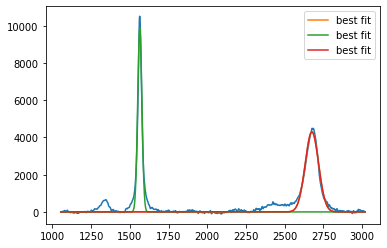

In [45]:
x=df.raman_shift
y=df.intensity

peaks, _ = find_peaks(y, height=500,distance=150,width=20)
gmodel = Model(gaussian)
plt.plot(x, y)

for peak in peaks:
  result = gmodel.fit(y, x=x, amp=y[peak], cen=x[peak], wid=15)
  plt.plot(x, result.best_fit, '-', label='best fit')
  print(result.fit_report())
  print('-'*100)
  
plt.legend()
plt.show()

